In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

In [2]:
data = pd.read_csv('/Users/avyny/ML-course-Python/Datasets for ML course/songs.csv')
data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


,max_depth,train_score,mean_cross_val_score
0,28,0.997222,0.703101


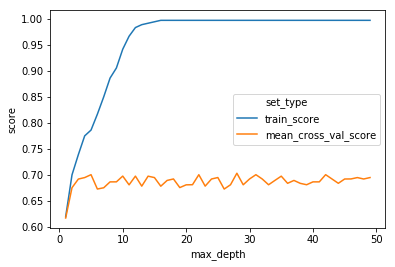

In [3]:
X_train = data.drop(['artist', 'year', 'song', 'artist', 'lyrics', 'genre'], axis = 1)
y_train = data.artist
y_train = y_train.replace({'gangstarr': [0], 'blind-guardian': [1], 'abba': [2]})

max_depth_value = range(1, 50)
scores_data = pd.DataFrame()
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score],
                                   'mean_cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'mean_cross_val_score'], 
                           var_name="set_type", value_name = "score")
sns.lineplot(x="max_depth", y = "score", hue = "set_type", data = scores_data_long)

max_score = scores_data.mean_cross_val_score.max()

scores_data.loc[scores_data.mean_cross_val_score == max_score,:]


In [5]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
best_clf.fit(X_train, y_train)
best_clf.predict(X_test)

NameError: name 'X_test' is not defined